In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import cv2
import time

from PIL import Image

In [2]:
input_dir = "/mnt/c/Projects/Master/Testdata/Wings/Hive01_Sheet_01/"
output_dir = "/mnt/c/Projects/Master/Testdata/Segmented/Hive01_Sheet_01/"

# Ensure the input directory exists
if not os.path.exists(input_dir):
    raise FileNotFoundError(f"Input directory '{input_dir}' was not found.")

# Create the output directory
os.makedirs(output_dir, exist_ok=True)

In [3]:
wing = cv2.imread("/mnt/c/Projects/Master/Testdata/Wings/Hive01_Sheet_01/Hive01_Sheet_01_Label_1_Left.jpg")

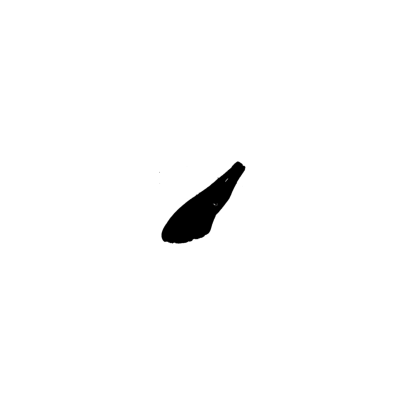

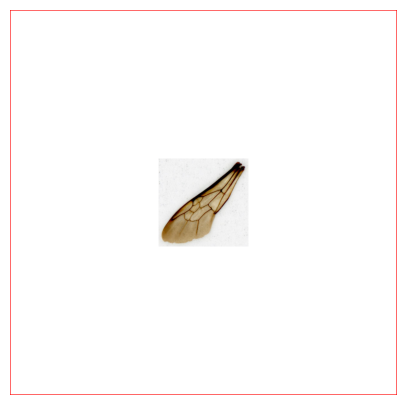

/tmp/ipykernel_11089/3724207055.py:39: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


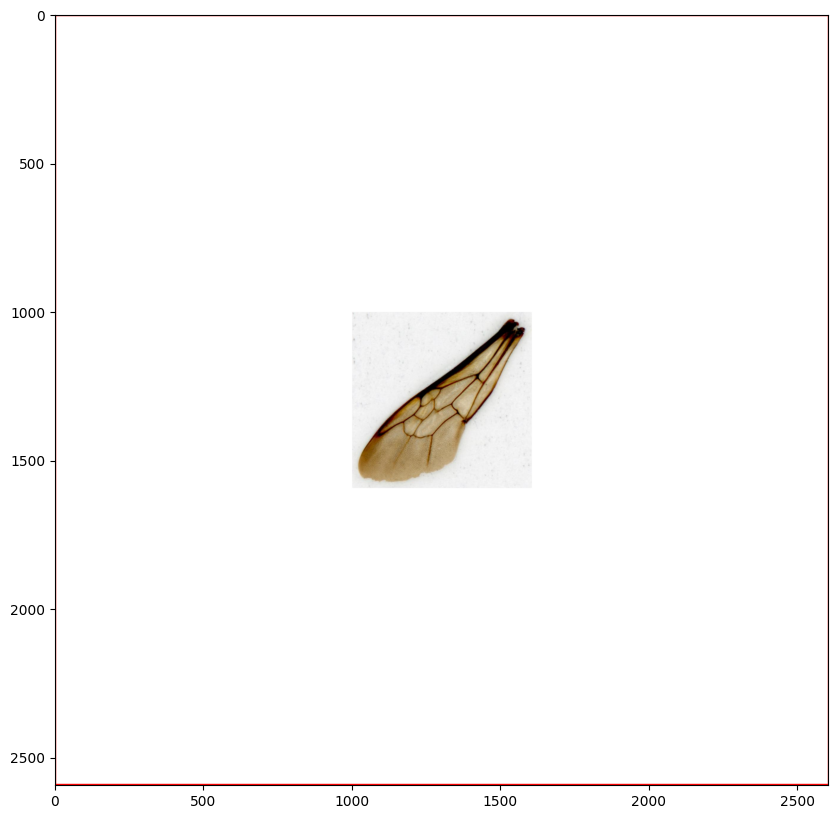

In [13]:
expanded_image = cv2.copyMakeBorder(wing, 1000, 1000, 1000, 1000, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# Convert the image to grayscale
gray = cv2.cvtColor(expanded_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Show image
plt.figure(figsize=(5, 5))
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.show()

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 5000]

# Draw contours on the image for visualization
wing_contour_image = expanded_image.copy()
cv2.drawContours(wing_contour_image, large_contours, -1, (0, 0, 255), 5)

# Show image
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(wing_contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Loop through the contours and draw the minimum area rectangle around each one
for contour in large_contours:
    # Get the minimum area rectangle
    rect = cv2.minAreaRect(contour)
    
    # Get the four points of the rectangle
    box = cv2.boxPoints(rect)
    
    # Convert the points to integers
    box = np.int0(box)
    
    # Draw the rotated rectangle on the original image
    cv2.drawContours(expanded_image, [box], 0, (0, 0, 255), 5)

# Show image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(expanded_image, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

In [ ]:
?cv2.boundingRect

In [7]:
box

array([[  2,   2],
       [603,   2],
       [603, 591],
       [  2, 591]])